### 1.描述性统计

In [11]:
import re
import numpy as np
import scipy.stats as stats


def main():
    data_str = """000001.SZ_平安银行_all2.xlsx: MAE=0.07136175781488419, MSE=0.00873156450688839, R2=-0.7580348737669618
000002.SZ_万科A_all2.xlsx: MAE=0.3110802471637726, MSE=0.13729043304920197, R2=-1.6443755122416435
000063.SZ_中兴通讯_all2.xlsx: MAE=0.14603298902511597, MSE=0.04231429472565651, R2=-3.765324852211606
000100.SZ_TCL科技_all2.xlsx: MAE=0.09987262636423111, MSE=0.022255374118685722, R2=-0.22794012485870963
000157.SZ_中联重科_all2.xlsx: MAE=0.08213036507368088, MSE=0.017078079283237457, R2=0.005377151195490426
000166.SZ_申万宏源_all2.xlsx: MAE=0.20223313570022583, MSE=0.059015918523073196, R2=-2.523167283962694
000301.SZ_东方盛虹_all2.xlsx: MAE=0.30482879281044006, MSE=0.11393313854932785, R2=-6.09309768668203
000333.SZ_美的集团_all2.xlsx: MAE=0.10772908478975296, MSE=0.01988966576755047, R2=-0.03779437335086566
000338.SZ_潍柴动力_all2.xlsx: MAE=0.11197507381439209, MSE=0.013483901508152485, R2=-11.843930531359094
000408.SZ_藏格矿业_all2.xlsx: MAE=0.3986177146434784, MSE=0.1870756894350052, R2=-10.695321417478192
000425.SZ_徐工机械_all2.xlsx: MAE=0.02050088532269001, MSE=0.0006022182642482221, R2=-0.3524890019292308
000538.SZ_云南白药_all2.xlsx: MAE=0.08276640623807907, MSE=0.01337635237723589, R2=-0.08898744420392624
000568.SZ_泸州老窖_all2.xlsx: MAE=0.10892277210950851, MSE=0.01914072595536709, R2=-0.17709002097531368
000596.SZ_古井贡酒_all2.xlsx: MAE=0.10380462557077408, MSE=0.019457371905446053, R2=-0.11486052192587715
000617.SZ_中油资本_all2.xlsx: MAE=0.09257173538208008, MSE=0.011409743689000607, R2=-0.35041248544733583
000625.SZ_长安汽车_all2.xlsx: MAE=0.12168114632368088, MSE=0.028733059763908386, R2=-0.6523735841109446
000630.SZ_铜陵有色_all2.xlsx: MAE=0.014358793385326862, MSE=0.00035846850369125605, R2=-0.05592350372847532
000651.SZ_格力电器_all2.xlsx: MAE=0.046991873532533646, MSE=0.004476437345147133, R2=-0.5980345043987516
000661.SZ_长春高新_all2.xlsx: MAE=0.19182075560092926, MSE=0.050169382244348526, R2=-0.42624221034384235
000708.SZ_中信特钢_all2.xlsx: MAE=0.09829659014940262, MSE=0.013126376084983349, R2=-0.653299952788488
000725.SZ_京东方A_all2.xlsx: MAE=0.07138653844594955, MSE=0.006842719856649637, R2=-0.34967703548246476
000768.SZ_中航西飞_all2.xlsx: MAE=0.14268003404140472, MSE=0.027075594291090965, R2=-1.2015508145924674
000776.SZ_广发证券_all2.xlsx: MAE=0.14894281327724457, MSE=0.05267120897769928, R2=-0.7575258019378646
000786.SZ_北新建材_all2.xlsx: MAE=0.037840113043785095, MSE=0.0024107869248837233, R2=-0.1741849750474882
000792.SZ_盐湖股份_all2.xlsx: MAE=0.13125260174274445, MSE=0.0316251702606678, R2=-0.030535834272880313
000800.SZ_一汽解放_all2.xlsx: MAE=0.10784374922513962, MSE=0.019786527380347252, R2=-1.6716683955940184
000807.SZ_云铝股份_all2.xlsx: MAE=0.1909671276807785, MSE=0.06574461609125137, R2=-0.4637450267474872
000858.SZ_五粮液_all2.xlsx: MAE=0.08199525624513626, MSE=0.011683273129165173, R2=-0.01880252327152343
000876.SZ_新希望_all2.xlsx: MAE=0.04500618577003479, MSE=0.0020255567505955696, R2=0.0
000895.SZ_双汇发展_all2.xlsx: MAE=0.09357701987028122, MSE=0.011730893515050411, R2=-2.984507131516835
000938.SZ_紫光股份_all2.xlsx: MAE=0.24809928238391876, MSE=0.08117283135652542, R2=-2.579644137912436
600000.SH_浦发银行_all2.xlsx: MAE=0.12181437015533447, MSE=0.022433020174503326, R2=-0.27677967375098356
600009.SH_上海机场_all2.xlsx: MAE=0.06351721286773682, MSE=0.0062776184640824795, R2=-0.28239378742807353
600010.SH_包钢股份_all2.xlsx: MAE=0.09183543175458908, MSE=0.013564996421337128, R2=-0.8581080420277238
600011.SH_华能国际_all2.xlsx: MAE=0.09242770075798035, MSE=0.014491383917629719, R2=-1.1909223904639594
600015.SH_华夏银行_all2.xlsx: MAE=0.07140777260065079, MSE=0.00824869517236948, R2=-0.684311831734248
600028.SH_中国石化_all2.xlsx: MAE=0.06880638003349304, MSE=0.006667934358119965, R2=-0.7374042073026865
600029.SH_南方航空_all2.xlsx: MAE=0.11703101545572281, MSE=0.02103952132165432, R2=-0.1035222484607281
600030.SH_中信证券_all2.xlsx: MAE=0.2081184834241867, MSE=0.07699234038591385, R2=-1.93401166461914
600031.SH_三一重工_all2.xlsx: MAE=0.07569664716720581, MSE=0.009948640130460262, R2=-0.0577575384463378
600036.SH_招商银行_all2.xlsx: MAE=0.07229635864496231, MSE=0.009855751879513264, R2=-0.26320490817256337
600039.SH_四川路桥_all2.xlsx: MAE=0.07029175013303757, MSE=0.006466645747423172, R2=-0.08442651418877323
600048.SH_保利发展_all2.xlsx: MAE=0.18290269374847412, MSE=0.06710116565227509, R2=-0.319104072557024
600050.SH_中国联通_all2.xlsx: MAE=0.07681293785572052, MSE=0.008655864745378494, R2=-0.6347064469297676
600104.SH_上汽集团_all2.xlsx: MAE=0.14184120297431946, MSE=0.031177544966340065, R2=-1.8819771700669272
600111.SH_北方稀土_all2.xlsx: MAE=0.05632486566901207, MSE=0.0047655426897108555, R2=-0.7945314716030285
600436.SH_片仔癀_all2.xlsx: MAE=0.042834192514419556, MSE=0.003410194767639041, R2=-0.521129111366492
600519.SH_贵州茅台_all2.xlsx: MAE=0.06242271140217781, MSE=0.008974418044090271, R2=-0.23745421192670513
600600.SH_青岛啤酒_all2.xlsx: MAE=0.08272174745798111, MSE=0.012919340282678604, R2=-0.44899000486145435
600660.SH_福耀玻璃_all2.xlsx: MAE=0.06912220269441605, MSE=0.00869384128600359, R2=-0.033288189077104624"""



    # 使用正则表达式提取数字数据
    pattern = r"MAE=(.*?), MSE=(.*?), R2=(.*?)\n"
    matches = re.findall(pattern, data_str)
    data = np.array(matches, dtype=float)


    # 计算各种统计指标
    mean_values = np.mean(data, axis=0)
    std_error = stats.sem(data, axis=0)
    median_values = np.median(data, axis=0)
    std_dev = np.std(data, axis=0)
    variance = np.var(data, axis=0)
    kurtosis = stats.kurtosis(data, axis=0)
    skewness = stats.skew(data, axis=0)
    max_values = np.max(data, axis=0)
    min_values = np.min(data, axis=0)


    # 保留小数点后 5 位
    mean_values = np.around(mean_values, decimals=5)
    std_error = np.around(std_error, decimals=5)
    median_values = np.around(median_values, decimals=5)
    std_dev = np.around(std_dev, decimals=5)
    variance = np.around(variance, decimals=5)
    kurtosis = np.around(kurtosis, decimals=5)
    skewness = np.around(skewness, decimals=5)
    max_values = np.around(max_values, decimals=5)
    min_values = np.around(min_values, decimals=5)


    # 输出结果
    print("平均值:", mean_values)
    print("标准误差:", std_error)
    print("中位数:", median_values)
    print("标准差:", std_dev)
    print("方差:", variance)
    print("峰度:", kurtosis)
    print("偏度:", skewness)
    print("最大值:", max_values)
    print("最小值:", min_values)


if __name__ == "__main__":
    main()

平均值: [ 0.11666  0.02914 -1.27747]
标准误差: [0.0109  0.0053  0.33913]
中位数: [ 0.09358  0.01356 -0.46375]
标准差: [0.0755  0.03675 2.34958]
方差: [5.7000e-03 1.3500e-03 5.5205e+00]
峰度: [ 3.21144  6.34478 11.03724]
偏度: [ 1.72048  2.44625 -3.3298 ]
最大值: [0.39862 0.18708 0.00538]
最小值: [ 1.436000e-02  3.600000e-04 -1.184393e+01]


### 2.生成箱型图、散点图

<Figure size 1000x500 with 0 Axes>

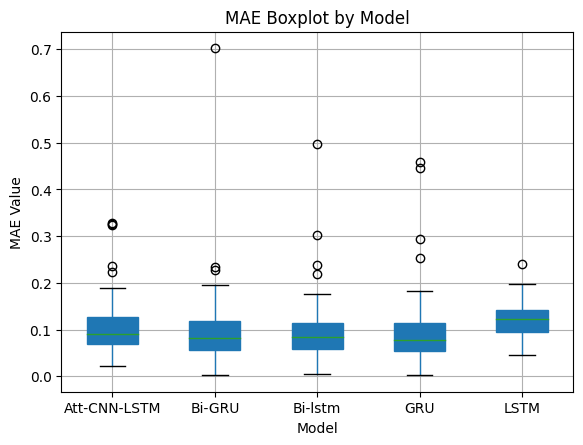

<Figure size 1000x500 with 0 Axes>

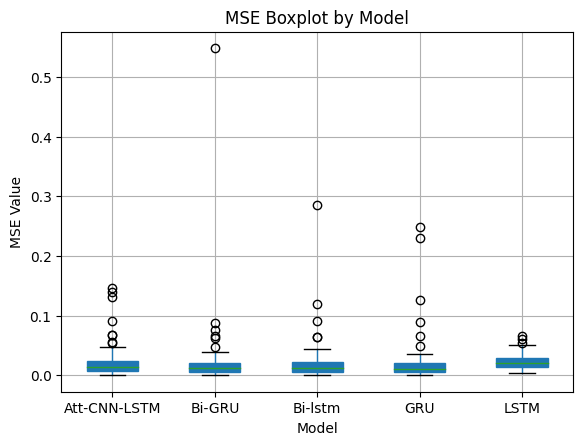

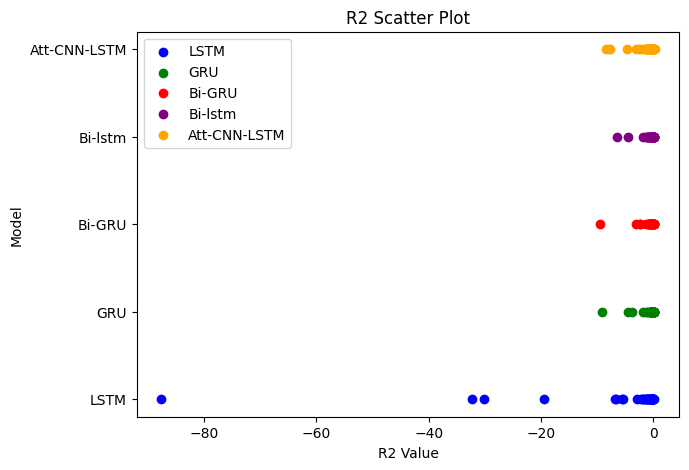

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt


def main():
    data_strs = [
        ("LSTM", """000001.SZ_平安银行_all2.xlsx: MAE=0.08534788340330124, MSE=0.013973918743431568, R2=-1.8135436072726332
000002.SZ_万科A_all2.xlsx: MAE=0.22696001827716827, MSE=0.07977354526519775, R2=-0.5365325907019418
000063.SZ_中兴通讯_all2.xlsx: MAE=0.12657195329666138, MSE=0.026016568765044212, R2=-1.9299176370533568
000100.SZ_TCL科技_all2.xlsx: MAE=0.11674335598945618, MSE=0.028171831741929054, R2=-0.554380804028592
000157.SZ_中联重科_all2.xlsx: MAE=0.1010119840502739, MSE=0.01750762015581131, R2=-0.01963926919764858
000166.SZ_申万宏源_all2.xlsx: MAE=0.15713129937648773, MSE=0.04437312111258507, R2=-1.6490127649113298
000301.SZ_东方盛虹_all2.xlsx: MAE=0.1137690320611, MSE=0.023630978539586067, R2=-0.47118609531701794
000333.SZ_美的集团_all2.xlsx: MAE=0.15728862583637238, MSE=0.04596530273556709, R2=-1.3983578200351325
000338.SZ_潍柴动力_all2.xlsx: MAE=0.07196252793073654, MSE=0.00773438299074769, R2=-6.3672952110247545
000408.SZ_藏格矿业_all2.xlsx: MAE=0.1383487433195114, MSE=0.04399598762392998, R2=-1.750475928106174
000425.SZ_徐工机械_all2.xlsx: MAE=0.09470903128385544, MSE=0.015257605351507664, R2=-33.26621732408944
000538.SZ_云南白药_all2.xlsx: MAE=0.11922002583742142, MSE=0.0211882833391428, R2=-0.7249676122519402
000568.SZ_泸州老窖_all2.xlsx: MAE=0.1145356222987175, MSE=0.022511184215545654, R2=-0.38436191705359035
000596.SZ_古井贡酒_all2.xlsx: MAE=0.1218079924583435, MSE=0.02688463218510151, R2=-0.5404246452187962
000617.SZ_中油资本_all2.xlsx: MAE=0.13902051746845245, MSE=0.024012776091694832, R2=-1.8420580467490066
000625.SZ_长安汽车_all2.xlsx: MAE=0.1619596928358078, MSE=0.04174090549349785, R2=-1.4004255815556017
000630.SZ_铜陵有色_all2.xlsx: MAE=0.1456831693649292, MSE=0.03287080302834511, R2=-95.82595129933924
000651.SZ_格力电器_all2.xlsx: MAE=0.0699726864695549, MSE=0.007891922257840633, R2=-1.8173215703030867
000661.SZ_长春高新_all2.xlsx: MAE=0.14345183968544006, MSE=0.04017135500907898, R2=-0.14201284154635685
000708.SZ_中信特钢_all2.xlsx: MAE=0.08433112502098083, MSE=0.010385324247181416, R2=-0.30805769235122793
000725.SZ_京东方A_all2.xlsx: MAE=0.06737423688173294, MSE=0.007427481468766928, R2=-0.4650169554703256
000768.SZ_中航西飞_all2.xlsx: MAE=0.16419030725955963, MSE=0.03843912109732628, R2=-2.1255337245357624
000776.SZ_广发证券_all2.xlsx: MAE=0.1514158695936203, MSE=0.04252098873257637, R2=-0.41883453192166176
000786.SZ_北新建材_all2.xlsx: MAE=0.07259894907474518, MSE=0.009306928142905235, R2=-3.532982196703589
000792.SZ_盐湖股份_all2.xlsx: MAE=0.20419244468212128, MSE=0.07143533229827881, R2=-1.3277875869672235
000800.SZ_一汽解放_all2.xlsx: MAE=0.10483905673027039, MSE=0.018853945657610893, R2=-1.545746627431332
000807.SZ_云铝股份_all2.xlsx: MAE=0.19802574813365936, MSE=0.058289870619773865, R2=-0.2977717099766739
000858.SZ_五粮液_all2.xlsx: MAE=0.10483763366937637, MSE=0.015586263500154018, R2=-0.35915039753811806
000876.SZ_新希望_all2.xlsx: MAE=0.00353357195854187, MSE=1.2486129890021402e-05, R2=0.0
000895.SZ_双汇发展_all2.xlsx: MAE=0.1879204958677292, MSE=0.042982712388038635, R2=-13.599477873047503
000938.SZ_紫光股份_all2.xlsx: MAE=0.1747276335954666, MSE=0.04328422620892525, R2=-0.9087929861406778
600000.SH_浦发银行_all2.xlsx: MAE=0.21392221748828888, MSE=0.061974722892045975, R2=-2.527303554400098
600009.SH_上海机场_all2.xlsx: MAE=0.08421368151903152, MSE=0.009919713251292706, R2=-1.0264021192179618
600010.SH_包钢股份_all2.xlsx: MAE=0.09479928761720657, MSE=0.012543197721242905, R2=-0.7181440253840761
600011.SH_华能国际_all2.xlsx: MAE=0.12342146784067154, MSE=0.023869207128882408, R2=-2.608736255256567
600015.SH_华夏银行_all2.xlsx: MAE=0.1513957381248474, MSE=0.03259475901722908, R2=-5.655566769618667
600028.SH_中国石化_all2.xlsx: MAE=0.07962176948785782, MSE=0.009131810627877712, R2=-1.3793945231766709
600029.SH_南方航空_all2.xlsx: MAE=0.1516287922859192, MSE=0.03270349279046059, R2=-0.7152971587152397
600030.SH_中信证券_all2.xlsx: MAE=0.14685456454753876, MSE=0.038735222071409225, R2=-0.4761155790131575
600031.SH_三一重工_all2.xlsx: MAE=0.12985476851463318, MSE=0.025621801614761353, R2=-1.7241565531546645
600036.SH_招商银行_all2.xlsx: MAE=0.09565972536802292, MSE=0.015285198576748371, R2=-0.959093391934454
600039.SH_四川路桥_all2.xlsx: MAE=0.10504522174596786, MSE=0.01906481385231018, R2=-2.197081000872944
600048.SH_保利发展_all2.xlsx: MAE=0.18092553317546844, MSE=0.051678914576768875, R2=-0.015926792727252392
600050.SH_中国联通_all2.xlsx: MAE=0.0713982805609703, MSE=0.009271477349102497, R2=-0.7509681436748046
600104.SH_上汽集团_all2.xlsx: MAE=0.12184379249811172, MSE=0.022898660972714424, R2=-1.1166969849764916
600111.SH_北方稀土_all2.xlsx: MAE=0.2414679080247879, MSE=0.07137446850538254, R2=-25.87705248734841
600436.SH_片仔癀_all2.xlsx: MAE=0.060797035694122314, MSE=0.00669053616002202, R2=-1.9843370612087128
600519.SH_贵州茅台_all2.xlsx: MAE=0.11598769575357437, MSE=0.01938282512128353, R2=-1.6726365334924882
600600.SH_青岛啤酒_all2.xlsx: MAE=0.09674898535013199, MSE=0.012387819588184357, R2=-0.38937642189463095
600660.SH_福耀玻璃_all2.xlsx: MAE=0.11169850826263428, MSE=0.021442880854010582, R2=-1.5485484048272418"""),
        ("GRU", """000001.SZ_平安银行_all2.xlsx: MAE=0.10240001231431961, MSE=0.016803935170173645, R2=-2.383346023159314
000002.SZ_万科A_all2.xlsx: MAE=0.23291759192943573, MSE=0.08312570303678513, R2=-0.6010990413561268
000063.SZ_中兴通讯_all2.xlsx: MAE=0.12077382951974869, MSE=0.026880132034420967, R2=-2.027169901343949
000100.SZ_TCL科技_all2.xlsx: MAE=0.14558260142803192, MSE=0.03490689396858215, R2=-0.9259877076324046
000157.SZ_中联重科_all2.xlsx: MAE=0.13639119267463684, MSE=0.031412094831466675, R2=-0.8294321531548192
000166.SZ_申万宏源_all2.xlsx: MAE=0.14572198688983917, MSE=0.032884325832128525, R2=-0.9631478820805031
000301.SZ_东方盛虹_all2.xlsx: MAE=0.14013032615184784, MSE=0.03256118670105934, R2=-1.027151149774237
000333.SZ_美的集团_all2.xlsx: MAE=0.1456390619277954, MSE=0.03142378106713295, R2=-0.6396163378024291
000338.SZ_潍柴动力_all2.xlsx: MAE=0.12967361509799957, MSE=0.021713247522711754, R2=-19.682696159102726
000408.SZ_藏格矿业_all2.xlsx: MAE=0.15474161505699158, MSE=0.0488734096288681, R2=-2.055395163864324
000425.SZ_徐工机械_all2.xlsx: MAE=0.11088824272155762, MSE=0.01891477219760418, R2=-41.47964301500572
000538.SZ_云南白药_all2.xlsx: MAE=0.12153470516204834, MSE=0.019277460873126984, R2=-0.5694047692447339
000568.SZ_泸州老窖_all2.xlsx: MAE=0.1503189206123352, MSE=0.02730843983590603, R2=-0.679376829682196
000596.SZ_古井贡酒_all2.xlsx: MAE=0.12298005074262619, MSE=0.02731565199792385, R2=-0.5651209913761093
000617.SZ_中油资本_all2.xlsx: MAE=0.14547421038150787, MSE=0.04146073758602142, R2=-3.907130453136671
000625.SZ_长安汽车_all2.xlsx: MAE=0.13600145280361176, MSE=0.0348532535135746, R2=-1.0043324430195164
000630.SZ_铜陵有色_all2.xlsx: MAE=0.1002143993973732, MSE=0.014760392718017101, R2=-42.47898080178967
000651.SZ_格力电器_all2.xlsx: MAE=0.11722294241189957, MSE=0.022312648594379425, R2=-6.9653483677411385
000661.SZ_长春高新_all2.xlsx: MAE=0.2068825215101242, MSE=0.0663873627781868, R2=-0.8872958416755132
000708.SZ_中信特钢_all2.xlsx: MAE=0.08716142177581787, MSE=0.014261324889957905, R2=-0.796249817683726
000725.SZ_京东方A_all2.xlsx: MAE=0.09597659111022949, MSE=0.014074809849262238, R2=-1.77615442368064
000768.SZ_中航西飞_all2.xlsx: MAE=0.13088645040988922, MSE=0.02586711011826992, R2=-1.103287481489052
000776.SZ_广发证券_all2.xlsx: MAE=0.17620818316936493, MSE=0.06546884030103683, R2=-1.1845551243045658
000786.SZ_北新建材_all2.xlsx: MAE=0.09187432378530502, MSE=0.013368838466703892, R2=-5.511354612804793
000792.SZ_盐湖股份_all2.xlsx: MAE=0.1997777372598648, MSE=0.07117883116006851, R2=-1.3194290166094187
000800.SZ_一汽解放_all2.xlsx: MAE=0.13846509158611298, MSE=0.028028106316924095, R2=-2.784484090881224
000807.SZ_云铝股份_all2.xlsx: MAE=0.21142196655273438, MSE=0.08305039256811142, R2=-0.8490426090247392
000858.SZ_五粮液_all2.xlsx: MAE=0.1308162361383438, MSE=0.025373607873916626, R2=-1.2126243450390009
000876.SZ_新希望_all2.xlsx: MAE=0.008635014295578003, MSE=7.45634752092883e-05, R2=0.0
000895.SZ_双汇发展_all2.xlsx: MAE=0.16403017938137054, MSE=0.03722141310572624, R2=-11.642600862690479
000938.SZ_紫光股份_all2.xlsx: MAE=0.16280211508274078, MSE=0.0417003333568573, R2=-0.8389448280360574
600000.SH_浦发银行_all2.xlsx: MAE=0.17206668853759766, MSE=0.044747065752744675, R2=-1.5467876298772514
600009.SH_上海机场_all2.xlsx: MAE=0.09316450357437134, MSE=0.01350810844451189, R2=-1.7594408774950585
600010.SH_包钢股份_all2.xlsx: MAE=0.12053951621055603, MSE=0.02656414546072483, R2=-2.6387074935906183
600011.SH_华能国际_all2.xlsx: MAE=0.10468722134828568, MSE=0.022692805156111717, R2=-2.4308782948330094
600015.SH_华夏银行_all2.xlsx: MAE=0.18079330027103424, MSE=0.04700798913836479, R2=-8.598621105280058
600028.SH_中国石化_all2.xlsx: MAE=0.07198216766119003, MSE=0.009217432700097561, R2=-1.4017043788333914
600029.SH_南方航空_all2.xlsx: MAE=0.12356045097112656, MSE=0.024501582607626915, R2=-0.2851072553243048
600030.SH_中信证券_all2.xlsx: MAE=0.2187829166650772, MSE=0.07503169029951096, R2=-1.8592955285575026
600031.SH_三一重工_all2.xlsx: MAE=0.10531461238861084, MSE=0.019236838445067406, R2=-1.0452956627645706
600036.SH_招商银行_all2.xlsx: MAE=0.11540764570236206, MSE=0.01864013820886612, R2=-1.389093710128361
600039.SH_四川路桥_all2.xlsx: MAE=0.10102596133947372, MSE=0.01849532499909401, R2=-2.1015803016775396
600048.SH_保利发展_all2.xlsx: MAE=0.18947242200374603, MSE=0.05984701216220856, R2=-0.1764986897787013
600050.SH_中国联通_all2.xlsx: MAE=0.10878030210733414, MSE=0.01999123953282833, R2=-2.7754525975491564
600104.SH_上汽集团_all2.xlsx: MAE=0.1319112628698349, MSE=0.029933204874396324, R2=-1.7669532756604878
600111.SH_北方稀土_all2.xlsx: MAE=0.1854998916387558, MSE=0.043947767466306686, R2=-15.54914303972069
600436.SH_片仔癀_all2.xlsx: MAE=0.09341456741094589, MSE=0.015273447148501873, R2=-5.812774532259686
600519.SH_贵州茅台_all2.xlsx: MAE=0.09927168488502502, MSE=0.015117143280804157, R2=-1.0844552094133237
600600.SH_青岛啤酒_all2.xlsx: MAE=0.11309713125228882, MSE=0.019450010731816292, R2=-1.1814482107039095
600660.SH_福耀玻璃_all2.xlsx: MAE=0.1300651580095291, MSE=0.024592570960521698, R2=-1.9228979692387766"""),
        ("Bi-GRU", """000001.SZ_平安银行_all2.xlsx: MAE=0.10304541140794754, MSE=0.016498610377311707, R2=-2.3218712850055883
000002.SZ_万科A_all2.xlsx: MAE=0.2376871556043625, MSE=0.09278565645217896, R2=-0.7871611844639979
000063.SZ_中兴通讯_all2.xlsx: MAE=0.10284066200256348, MSE=0.020113179460167885, R2=-1.2650937443898056
000100.SZ_TCL科技_all2.xlsx: MAE=0.11039310693740845, MSE=0.026054413989186287, R2=-0.43755212441454705
000157.SZ_中联重科_all2.xlsx: MAE=0.10817494988441467, MSE=0.01911824382841587, R2=-0.11344147225769774
000166.SZ_申万宏源_all2.xlsx: MAE=0.14808733761310577, MSE=0.03181701526045799, R2=-0.8994308710467591
000301.SZ_东方盛虹_all2.xlsx: MAE=0.11423686891794205, MSE=0.022365892305970192, R2=-0.392426041877189
000333.SZ_美的集团_all2.xlsx: MAE=0.1399877518415451, MSE=0.03675981983542442, R2=-0.918037963538743
000338.SZ_潍柴动力_all2.xlsx: MAE=0.13085423409938812, MSE=0.025976935401558876, R2=-23.744023328166097
000408.SZ_藏格矿业_all2.xlsx: MAE=0.15902425348758698, MSE=0.047144144773483276, R2=-1.9472875875348965
000425.SZ_徐工机械_all2.xlsx: MAE=0.20303791761398315, MSE=0.057372793555259705, R2=-127.85040118074076
000538.SZ_云南白药_all2.xlsx: MAE=0.10537254810333252, MSE=0.016622258350253105, R2=-0.3532411160032318
000568.SZ_泸州老窖_all2.xlsx: MAE=0.12000930309295654, MSE=0.020796196535229683, R2=-0.2788959577318011
000596.SZ_古井贡酒_all2.xlsx: MAE=0.10386830568313599, MSE=0.023598818108439445, R2=-0.35215541155705643
000617.SZ_中油资本_all2.xlsx: MAE=0.11500904709100723, MSE=0.024834653362631798, R2=-1.939332220392782
000625.SZ_长安汽车_all2.xlsx: MAE=0.1538763791322708, MSE=0.0329304076731205, R2=-0.8937538725592367
000630.SZ_铜陵有色_all2.xlsx: MAE=0.0763983353972435, MSE=0.00841010082513094, R2=-23.77323230121462
000651.SZ_格力电器_all2.xlsx: MAE=0.16070620715618134, MSE=0.036450739949941635, R2=-12.012477203954143
000661.SZ_长春高新_all2.xlsx: MAE=0.16981065273284912, MSE=0.04637743532657623, R2=-0.3184427328259336
000708.SZ_中信特钢_all2.xlsx: MAE=0.09460106492042542, MSE=0.014110059477388859, R2=-0.7771973573781437
000725.SZ_京东方A_all2.xlsx: MAE=0.08847862482070923, MSE=0.0115799056366086, R2=-1.2840526307717113
000768.SZ_中航西飞_all2.xlsx: MAE=0.12390679121017456, MSE=0.0222413782030344, R2=-0.8084747734199456
000776.SZ_广发证券_all2.xlsx: MAE=0.15440265834331512, MSE=0.0356682613492012, R2=-0.1901736330478765
000786.SZ_北新建材_all2.xlsx: MAE=0.0826558768749237, MSE=0.011038628406822681, R2=-4.376415134388567
000792.SZ_盐湖股份_all2.xlsx: MAE=0.19144146144390106, MSE=0.057254474610090256, R2=-0.8656908930159632
000800.SZ_一汽解放_all2.xlsx: MAE=0.13640910387039185, MSE=0.026889681816101074, R2=-2.630769220463756
000807.SZ_云铝股份_all2.xlsx: MAE=0.19599415361881256, MSE=0.05569634959101677, R2=-0.24002930834556024
000858.SZ_五粮液_all2.xlsx: MAE=0.13064952194690704, MSE=0.02573188580572605, R2=-1.243867051409906
000876.SZ_新希望_all2.xlsx: MAE=0.01711335778236389, MSE=0.00029286701465025544, R2=0.0
000895.SZ_双汇发展_all2.xlsx: MAE=0.20136630535125732, MSE=0.05236716940999031, R2=-16.786997159714804
000938.SZ_紫光股份_all2.xlsx: MAE=0.1493048220872879, MSE=0.0404789112508297, R2=-0.7850811445849928
600000.SH_浦发银行_all2.xlsx: MAE=0.16567711532115936, MSE=0.037571877241134644, R2=-1.1384107856098384
600009.SH_上海机场_all2.xlsx: MAE=0.09054698795080185, MSE=0.011145487427711487, R2=-1.276803620169332
600010.SH_包钢股份_all2.xlsx: MAE=0.11128134280443192, MSE=0.017043445259332657, R2=-1.334579567635772
600011.SH_华能国际_all2.xlsx: MAE=0.0960521325469017, MSE=0.014588444493710995, R2=-1.2055967910812644
600015.SH_华夏银行_all2.xlsx: MAE=0.16147834062576294, MSE=0.03746931627392769, R2=-6.6509086340340895
600028.SH_中国石化_all2.xlsx: MAE=0.08269757777452469, MSE=0.009633653797209263, R2=-1.5101551684617363
600029.SH_南方航空_all2.xlsx: MAE=0.15627706050872803, MSE=0.03657231852412224, R2=-0.9182170135567977
600030.SH_中信证券_all2.xlsx: MAE=0.21794641017913818, MSE=0.07010553032159805, R2=-1.6715702680628435
600031.SH_三一重工_all2.xlsx: MAE=0.09239494055509567, MSE=0.012834745459258556, R2=-0.3646134923649835
600036.SH_招商银行_all2.xlsx: MAE=0.0889432430267334, MSE=0.01190104614943266, R2=-0.5253487501659244
600039.SH_四川路桥_all2.xlsx: MAE=0.07952497154474258, MSE=0.008387885987758636, R2=-0.40660951419144253
600048.SH_保利发展_all2.xlsx: MAE=0.21647311747074127, MSE=0.0801931843161583, R2=-0.5764727236010576
600050.SH_中国联通_all2.xlsx: MAE=0.08741763234138489, MSE=0.011510835029184818, R2=-1.1738830232819608
600104.SH_上汽集团_all2.xlsx: MAE=0.09876535087823868, MSE=0.0159560889005661, R2=-0.4749422689249392
600111.SH_北方稀土_all2.xlsx: MAE=0.2029377967119217, MSE=0.04859403893351555, R2=-17.298761825367038
600436.SH_片仔癀_all2.xlsx: MAE=0.09906818717718124, MSE=0.01629035733640194, R2=-6.266370534383039
600519.SH_贵州茅台_all2.xlsx: MAE=0.1034909263253212, MSE=0.014287193305790424, R2=-0.9700161688335112
600600.SH_青岛啤酒_all2.xlsx: MAE=0.08390650898218155, MSE=0.016066676005721092, R2=-0.8019847460590472
600660.SH_福耀玻璃_all2.xlsx: MAE=0.12702862918376923, MSE=0.023684391751885414, R2=-1.814958160563982"""),
        ("Bi-lstm", """000001.SZ_平安银行_all2.xlsx: MAE=0.04729313775897026, MSE=0.004990675486624241, R2=-0.00483501493528915
000002.SZ_万科A_all2.xlsx: MAE=0.49782299995422363, MSE=0.2851705253124237, R2=-4.492720497071368
000063.SZ_中兴通讯_all2.xlsx: MAE=0.07778528332710266, MSE=0.008900240063667297, R2=-0.0023216487722406143
000100.SZ_TCL科技_all2.xlsx: MAE=0.09433439373970032, MSE=0.017948618158698082, R2=0.009685071517129829
000157.SZ_中联重科_all2.xlsx: MAE=0.08865263313055038, MSE=0.016953270882368088, R2=0.012645960299696668
000166.SZ_申万宏源_all2.xlsx: MAE=0.10665073245763779, MSE=0.020601360127329826, R2=-0.22987220098642736
000301.SZ_东方盛虹_all2.xlsx: MAE=0.12928985059261322, MSE=0.024037769064307213, R2=-0.4965115153845234
000333.SZ_美的集团_all2.xlsx: MAE=0.1110888123512268, MSE=0.021714257076382637, R2=-0.1329971833109107
000338.SZ_潍柴动力_all2.xlsx: MAE=0.026429546996951103, MSE=0.0012401217827573419, R2=-0.1812632570256072
000408.SZ_藏格矿业_all2.xlsx: MAE=0.3033112585544586, MSE=0.12035471200942993, R2=-6.524157673642788
000425.SZ_徐工机械_all2.xlsx: MAE=0.0267792921513319, MSE=0.000989429303444922, R2=-1.2221049604807495
000538.SZ_云南白药_all2.xlsx: MAE=0.09827212244272232, MSE=0.0177056435495615, R2=-0.4414408890736481
000568.SZ_泸州老窖_all2.xlsx: MAE=0.09135625511407852, MSE=0.016612578183412552, R2=-0.021617545163277407
000596.SZ_古井贡酒_all2.xlsx: MAE=0.10177121311426163, MSE=0.023030122742056847, R2=-0.319570594139136
000617.SZ_中油资本_all2.xlsx: MAE=0.08280185610055923, MSE=0.010845430195331573, R2=-0.28362250741363404
000625.SZ_长安汽车_all2.xlsx: MAE=0.15310724079608917, MSE=0.04027038812637329, R2=-1.3158596435560144
000630.SZ_铜陵有色_all2.xlsx: MAE=0.019336791709065437, MSE=0.0006094222771935165, R2=-0.7951458580374944
000651.SZ_格力电器_all2.xlsx: MAE=0.042709097266197205, MSE=0.0036055471282452345, R2=-0.2871371531257101
000661.SZ_长春高新_all2.xlsx: MAE=0.17008014023303986, MSE=0.044820334762334824, R2=-0.27417649866431804
000708.SZ_中信特钢_all2.xlsx: MAE=0.07943455129861832, MSE=0.008505335077643394, R2=-0.07126828077148395
000725.SZ_京东方A_all2.xlsx: MAE=0.061258137226104736, MSE=0.005656134337186813, R2=-0.11563166130359948
000768.SZ_中航西飞_all2.xlsx: MAE=0.11302993446588516, MSE=0.023125996813178062, R2=-0.8804040704082534
000776.SZ_广发证券_all2.xlsx: MAE=0.12851087749004364, MSE=0.03461639955639839, R2=-0.15507541509326717
000786.SZ_北新建材_all2.xlsx: MAE=0.043235477060079575, MSE=0.0029063874389976263, R2=-0.41556939247560765
000792.SZ_盐湖股份_all2.xlsx: MAE=0.1326839178800583, MSE=0.0334879606962204, R2=-0.09123664991492908
000800.SZ_一汽解放_all2.xlsx: MAE=0.09602579474449158, MSE=0.013695231638848782, R2=-0.849193487750322
000807.SZ_云铝股份_all2.xlsx: MAE=0.23798803985118866, MSE=0.09091851860284805, R2=-1.024219383822794
000858.SZ_五粮液_all2.xlsx: MAE=0.08318088948726654, MSE=0.012446713633835316, R2=-0.0853759037359787
000876.SZ_新希望_all2.xlsx: MAE=0.0057548582553863525, MSE=3.3118394640041515e-05, R2=0.0
000895.SZ_双汇发展_all2.xlsx: MAE=0.034025926142930984, MSE=0.0029288704972714186, R2=0.005181849030092334
000938.SZ_紫光股份_all2.xlsx: MAE=0.21895281970500946, MSE=0.06342816352844238, R2=-1.7971210286349706
600000.SH_浦发银行_all2.xlsx: MAE=0.10620900988578796, MSE=0.01962551660835743, R2=-0.11699008611194883
600009.SH_上海机场_all2.xlsx: MAE=0.052014488726854324, MSE=0.0042664469219744205, R2=0.12844881458840118
600010.SH_包钢股份_all2.xlsx: MAE=0.07323082536458969, MSE=0.007533931639045477, R2=-0.03198401325014921
600011.SH_华能国际_all2.xlsx: MAE=0.08909515291452408, MSE=0.013879053294658661, R2=-1.0983454998310154
600015.SH_华夏银行_all2.xlsx: MAE=0.059132546186447144, MSE=0.005899650510400534, R2=-0.2046572091950507
600028.SH_中国石化_all2.xlsx: MAE=0.04889661446213722, MSE=0.004321329761296511, R2=-0.12597035088975317
600029.SH_南方航空_all2.xlsx: MAE=0.11320465058088303, MSE=0.01842052862048149, R2=0.033843761607378564
600030.SH_中信证券_all2.xlsx: MAE=0.12550629675388336, MSE=0.03149809315800667, R2=-0.20032435298284734
600031.SH_三一重工_all2.xlsx: MAE=0.07496614009141922, MSE=0.009942171163856983, R2=-0.057069704393525766
600036.SH_招商银行_all2.xlsx: MAE=0.06294887512922287, MSE=0.007172004785388708, R2=0.08076912246064838
600039.SH_四川路桥_all2.xlsx: MAE=0.07023738324642181, MSE=0.006015118211507797, R2=-0.008707379606940124
600048.SH_保利发展_all2.xlsx: MAE=0.1754840612411499, MSE=0.06363516300916672, R2=-0.25096781957938497
600050.SH_中国联通_all2.xlsx: MAE=0.05811149999499321, MSE=0.0054870713502168655, R2=-0.03626283062585656
600104.SH_上汽集团_all2.xlsx: MAE=0.08791343122720718, MSE=0.013756509870290756, R2=-0.27161850758612793
600111.SH_北方稀土_all2.xlsx: MAE=0.04207668825984001, MSE=0.0027760553639382124, R2=-0.045362308425468845
600436.SH_片仔癀_all2.xlsx: MAE=0.0350349061191082, MSE=0.002273177495226264, R2=-0.013958780987594288
600519.SH_贵州茅台_all2.xlsx: MAE=0.06032279506325722, MSE=0.00786412414163351, R2=-0.08435933856588718
600600.SH_青岛啤酒_all2.xlsx: MAE=0.06868835538625717, MSE=0.010397030971944332, R2=-0.16609633362102483
600660.SH_福耀玻璃_all2.xlsx: MAE=0.06450794637203217, MSE=0.008049733005464077, R2=0.04326612098415461"""),
        ("Att-CNN-LSTM", """000001.SZ_平安银行_all2.xlsx: MAE=0.08558554202318192, MSE=0.011355049908161163, R2=-1.2862540189604688
000002.SZ_万科A_all2.xlsx: MAE=0.32496368885040283, MSE=0.146417498588562, R2=-1.8201735491927926
000063.SZ_中兴通讯_all2.xlsx: MAE=0.08550373464822769, MSE=0.010973009280860424, R2=-0.23575149546166219
000100.SZ_TCL科技_all2.xlsx: MAE=0.09951076656579971, MSE=0.019255690276622772, R2=-0.062432692320453675
000157.SZ_中联重科_all2.xlsx: MAE=0.09216316789388657, MSE=0.01649387739598751, R2=0.03940090017413944
000166.SZ_申万宏源_all2.xlsx: MAE=0.12277165055274963, MSE=0.025905916467308998, R2=-0.5465467374024444
000301.SZ_东方盛虹_all2.xlsx: MAE=0.2350921630859375, MSE=0.06703320145606995, R2=-3.1732641399025914
000333.SZ_美的集团_all2.xlsx: MAE=0.10976370424032211, MSE=0.021274790167808533, R2=-0.11006683460196265
000338.SZ_潍柴动力_all2.xlsx: MAE=0.0944497212767601, MSE=0.009946539998054504, R2=-8.474458704146484
000408.SZ_藏格矿业_all2.xlsx: MAE=0.3242892324924469, MSE=0.13999827206134796, R2=-7.752204068865305
000425.SZ_徐工机械_all2.xlsx: MAE=0.02259097434580326, MSE=0.0007383886841125786, R2=-0.6583065825400645
000538.SZ_云南白药_all2.xlsx: MAE=0.08264846354722977, MSE=0.01405651867389679, R2=-0.14436072718819104
000568.SZ_泸州老窖_all2.xlsx: MAE=0.09083974361419678, MSE=0.018349366262555122, R2=-0.12842403559803417
000596.SZ_古井贡酒_all2.xlsx: MAE=0.08894530683755875, MSE=0.017483094707131386, R2=-0.0017392813694339093
000617.SZ_中油资本_all2.xlsx: MAE=0.07774867862462997, MSE=0.009585565887391567, R2=-0.13450997211352034
000625.SZ_长安汽车_all2.xlsx: MAE=0.14792512357234955, MSE=0.0368117056787014, R2=-1.1169585235147639
000630.SZ_铜陵有色_all2.xlsx: MAE=0.05170656368136406, MSE=0.0030146371573209763, R2=-7.8800715241462775
000651.SZ_格力电器_all2.xlsx: MAE=0.046882908791303635, MSE=0.004550229758024216, R2=-0.6243775214159417
000661.SZ_长春高新_all2.xlsx: MAE=0.16136878728866577, MSE=0.043681975454092026, R2=-0.24181466836638688
000708.SZ_中信特钢_all2.xlsx: MAE=0.08450517803430557, MSE=0.00904799159616232, R2=-0.1396173249489543
000725.SZ_京东方A_all2.xlsx: MAE=0.056534480303525925, MSE=0.005311769898980856, R2=-0.047708134220116216
000768.SZ_中航西飞_all2.xlsx: MAE=0.12709951400756836, MSE=0.022771021351218224, R2=-0.851540543882459
000776.SZ_广发证券_all2.xlsx: MAE=0.16414839029312134, MSE=0.047152359038591385, R2=-0.5733736047775291
000786.SZ_北新建材_all2.xlsx: MAE=0.03346991539001465, MSE=0.0028271281626075506, R2=-0.3769658063195427
000792.SZ_盐湖股份_all2.xlsx: MAE=0.1782013177871704, MSE=0.05557752773165703, R2=-0.8110459454974934
000800.SZ_一汽解放_all2.xlsx: MAE=0.07295043766498566, MSE=0.009041281417012215, R2=-0.22079559695150186
000807.SZ_云铝股份_all2.xlsx: MAE=0.2234315425157547, MSE=0.0902753546833992, R2=-1.009899993181941
000858.SZ_五粮液_all2.xlsx: MAE=0.08403325825929642, MSE=0.013079218566417694, R2=-0.1405315231379043
000876.SZ_新希望_all2.xlsx: MAE=0.046460479497909546, MSE=0.0021585761569440365, R2=0.0
000895.SZ_双汇发展_all2.xlsx: MAE=0.06038127839565277, MSE=0.006117038894444704, R2=-1.077709180202152
000938.SZ_紫光股份_all2.xlsx: MAE=0.32705315947532654, MSE=0.13152460753917694, R2=-4.80010930019537
600000.SH_浦发银行_all2.xlsx: MAE=0.10806051641702652, MSE=0.017887607216835022, R2=-0.018076637121313466
600009.SH_上海机场_all2.xlsx: MAE=0.06575403362512589, MSE=0.006748849060386419, R2=-0.37865690087611914
600010.SH_包钢股份_all2.xlsx: MAE=0.06664431095123291, MSE=0.007372319232672453, R2=-0.009846634314580882
600011.SH_华能国际_all2.xlsx: MAE=0.13076776266098022, MSE=0.023891953751444817, R2=-2.612175040776562
600015.SH_华夏银行_all2.xlsx: MAE=0.07557978481054306, MSE=0.00912089180201292, R2=-0.8624066928992586
600028.SH_中国石化_all2.xlsx: MAE=0.07593511044979095, MSE=0.0077659026719629765, R2=-1.0234923000148903
600029.SH_南方航空_all2.xlsx: MAE=0.12336090952157974, MSE=0.020122945308685303, R2=-0.05544788826856539
600030.SH_中信证券_all2.xlsx: MAE=0.17812947928905487, MSE=0.054993391036987305, R2=-1.0956792212811917
600031.SH_三一重工_all2.xlsx: MAE=0.0683341920375824, MSE=0.007499139755964279, R2=0.2026778070260018
600036.SH_招商银行_all2.xlsx: MAE=0.06942201405763626, MSE=0.009541139006614685, R2=-0.22288122666462673
600039.SH_四川路桥_all2.xlsx: MAE=0.09496011584997177, MSE=0.014642332680523396, R2=-1.4554514168254449
600048.SH_保利发展_all2.xlsx: MAE=0.18913328647613525, MSE=0.067842036485672, R2=-0.3336685197660805
600050.SH_中国联通_all2.xlsx: MAE=0.11337258666753769, MSE=0.018020885065197945, R2=-2.403340804797465
600104.SH_上汽集团_all2.xlsx: MAE=0.09352078288793564, MSE=0.015819121152162552, R2=-0.46228139641997457
600111.SH_北方稀土_all2.xlsx: MAE=0.05670340731739998, MSE=0.0045317187905311584, R2=-0.7064817927396703
600436.SH_片仔癀_all2.xlsx: MAE=0.03726721927523613, MSE=0.002483694115653634, R2=-0.10786048801430059
600519.SH_贵州茅台_all2.xlsx: MAE=0.09906674176454544, MSE=0.016194377094507217, R2=-1.2329915246967706
600600.SH_青岛啤酒_all2.xlsx: MAE=0.06176261231303215, MSE=0.009180697612464428, R2=-0.02967651671246152
600660.SH_福耀玻璃_all2.xlsx: MAE=0.07214897125959396, MSE=0.010263300500810146, R2=-0.21982289844875003""")
    ]


    all_data = []


    for model_name, data_str in data_strs:
        pattern = r"MAE=(.*?), MSE=(.*?), R2=(.*?)\n"
        matches = re.findall(pattern, data_str)
        for match in matches:
            mae, mse, r2 = map(float, match)
            all_data.append({'Model': model_name, 'MAE': mae, 'MSE': mse, 'R2': r2})


    df = pd.DataFrame(all_data)


    colors = ['blue', 'green', 'red', 'purple', 'orange']


    plt.figure(figsize=(10, 5))
    ax = df.boxplot(column='MAE', by='Model', patch_artist=True)
    for patch, color in zip(ax.artists, colors):
        patch.set_facecolor(color)
    plt.title('MAE Boxplot by Model')
    plt.ylabel('MAE Value')
    plt.suptitle('')  
    plt.show()



    plt.figure(figsize=(10, 5))
    ax = df.boxplot(column='MSE', by='Model', patch_artist=True)
    for patch, color in zip(ax.artists, colors):
        patch.set_facecolor(color)
    plt.title('MSE Boxplot by Model')
    plt.ylabel('MSE Value')
    plt.suptitle('') 
    plt.show()


    plt.figure(figsize=(7, 5))
    models = df['Model'].unique()
    for i, model in enumerate(models):
        group_data = df[df['Model'] == model]
        plt.scatter(group_data['R2'], np.full_like(group_data['R2'], i), label=model, color=colors[i])
    plt.title('R2 Scatter Plot')
    plt.yticks(range(len(models)), models)
    plt.xlabel('R2 Value')
    plt.ylabel('Model')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()